In [1]:

# downloading dataset
import gdown


In [5]:
id = '12vfq3DYFId3bsXuNj_PhsACMzrLTfObs'
gdown.download(id=id, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12vfq3DYFId3bsXuNj_PhsACMzrLTfObs
To: c:\Users\FineComputers\Desktop\live_cls\data_regression.csv
100%|██████████| 138k/138k [00:00<00:00, 162kB/s]


'data_regression.csv'

In [1]:
# importing libraries

import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data=pd.read_csv("data_regression.csv")
# get the first 5 rows
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


Types of the variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Total Samples with missing values:
82
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Total Missing Values per Variable
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched 

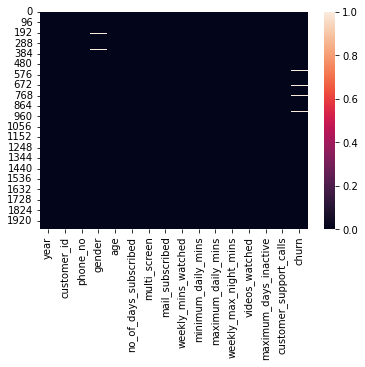

In [6]:
# check for the missing values and dataframes
def datainspection(dataframe):
  print("Types of the variables we are working with:")
  print(dataframe.dtypes)
  print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
  print("Total Samples with missing values:")

  print(data.isnull().any(axis=1).sum()) # null values
  print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
  print("Total Missing Values per Variable")
  print(data.isnull().sum())
  print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

datainspection(data)

In [7]:
data = data.dropna() # cleaning up null values

In [8]:
# function for encoding categorical variables
def encode_cat(data, vars):
  ord_en = OrdinalEncoder() 
  for v in vars:
    name = v+'_code' # add _code for encoded variables
    data[name] = ord_en.fit_transform(data[[v]])
    print('The encoded values for '+ v + ' are:')
    print(data[name].unique())
  return data

In [9]:
# check for the encoded variables
data = encode_cat(data, ['gender', 'multi_screen', 'mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


In [10]:
def full_plot(data, class_col, cols_to_exclude):
  cols = data.select_dtypes(include=np.number).columns.tolist() # finding all the numerical columns from the dataframe
  X = data[cols] # creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] # columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(data, hue=class_col)

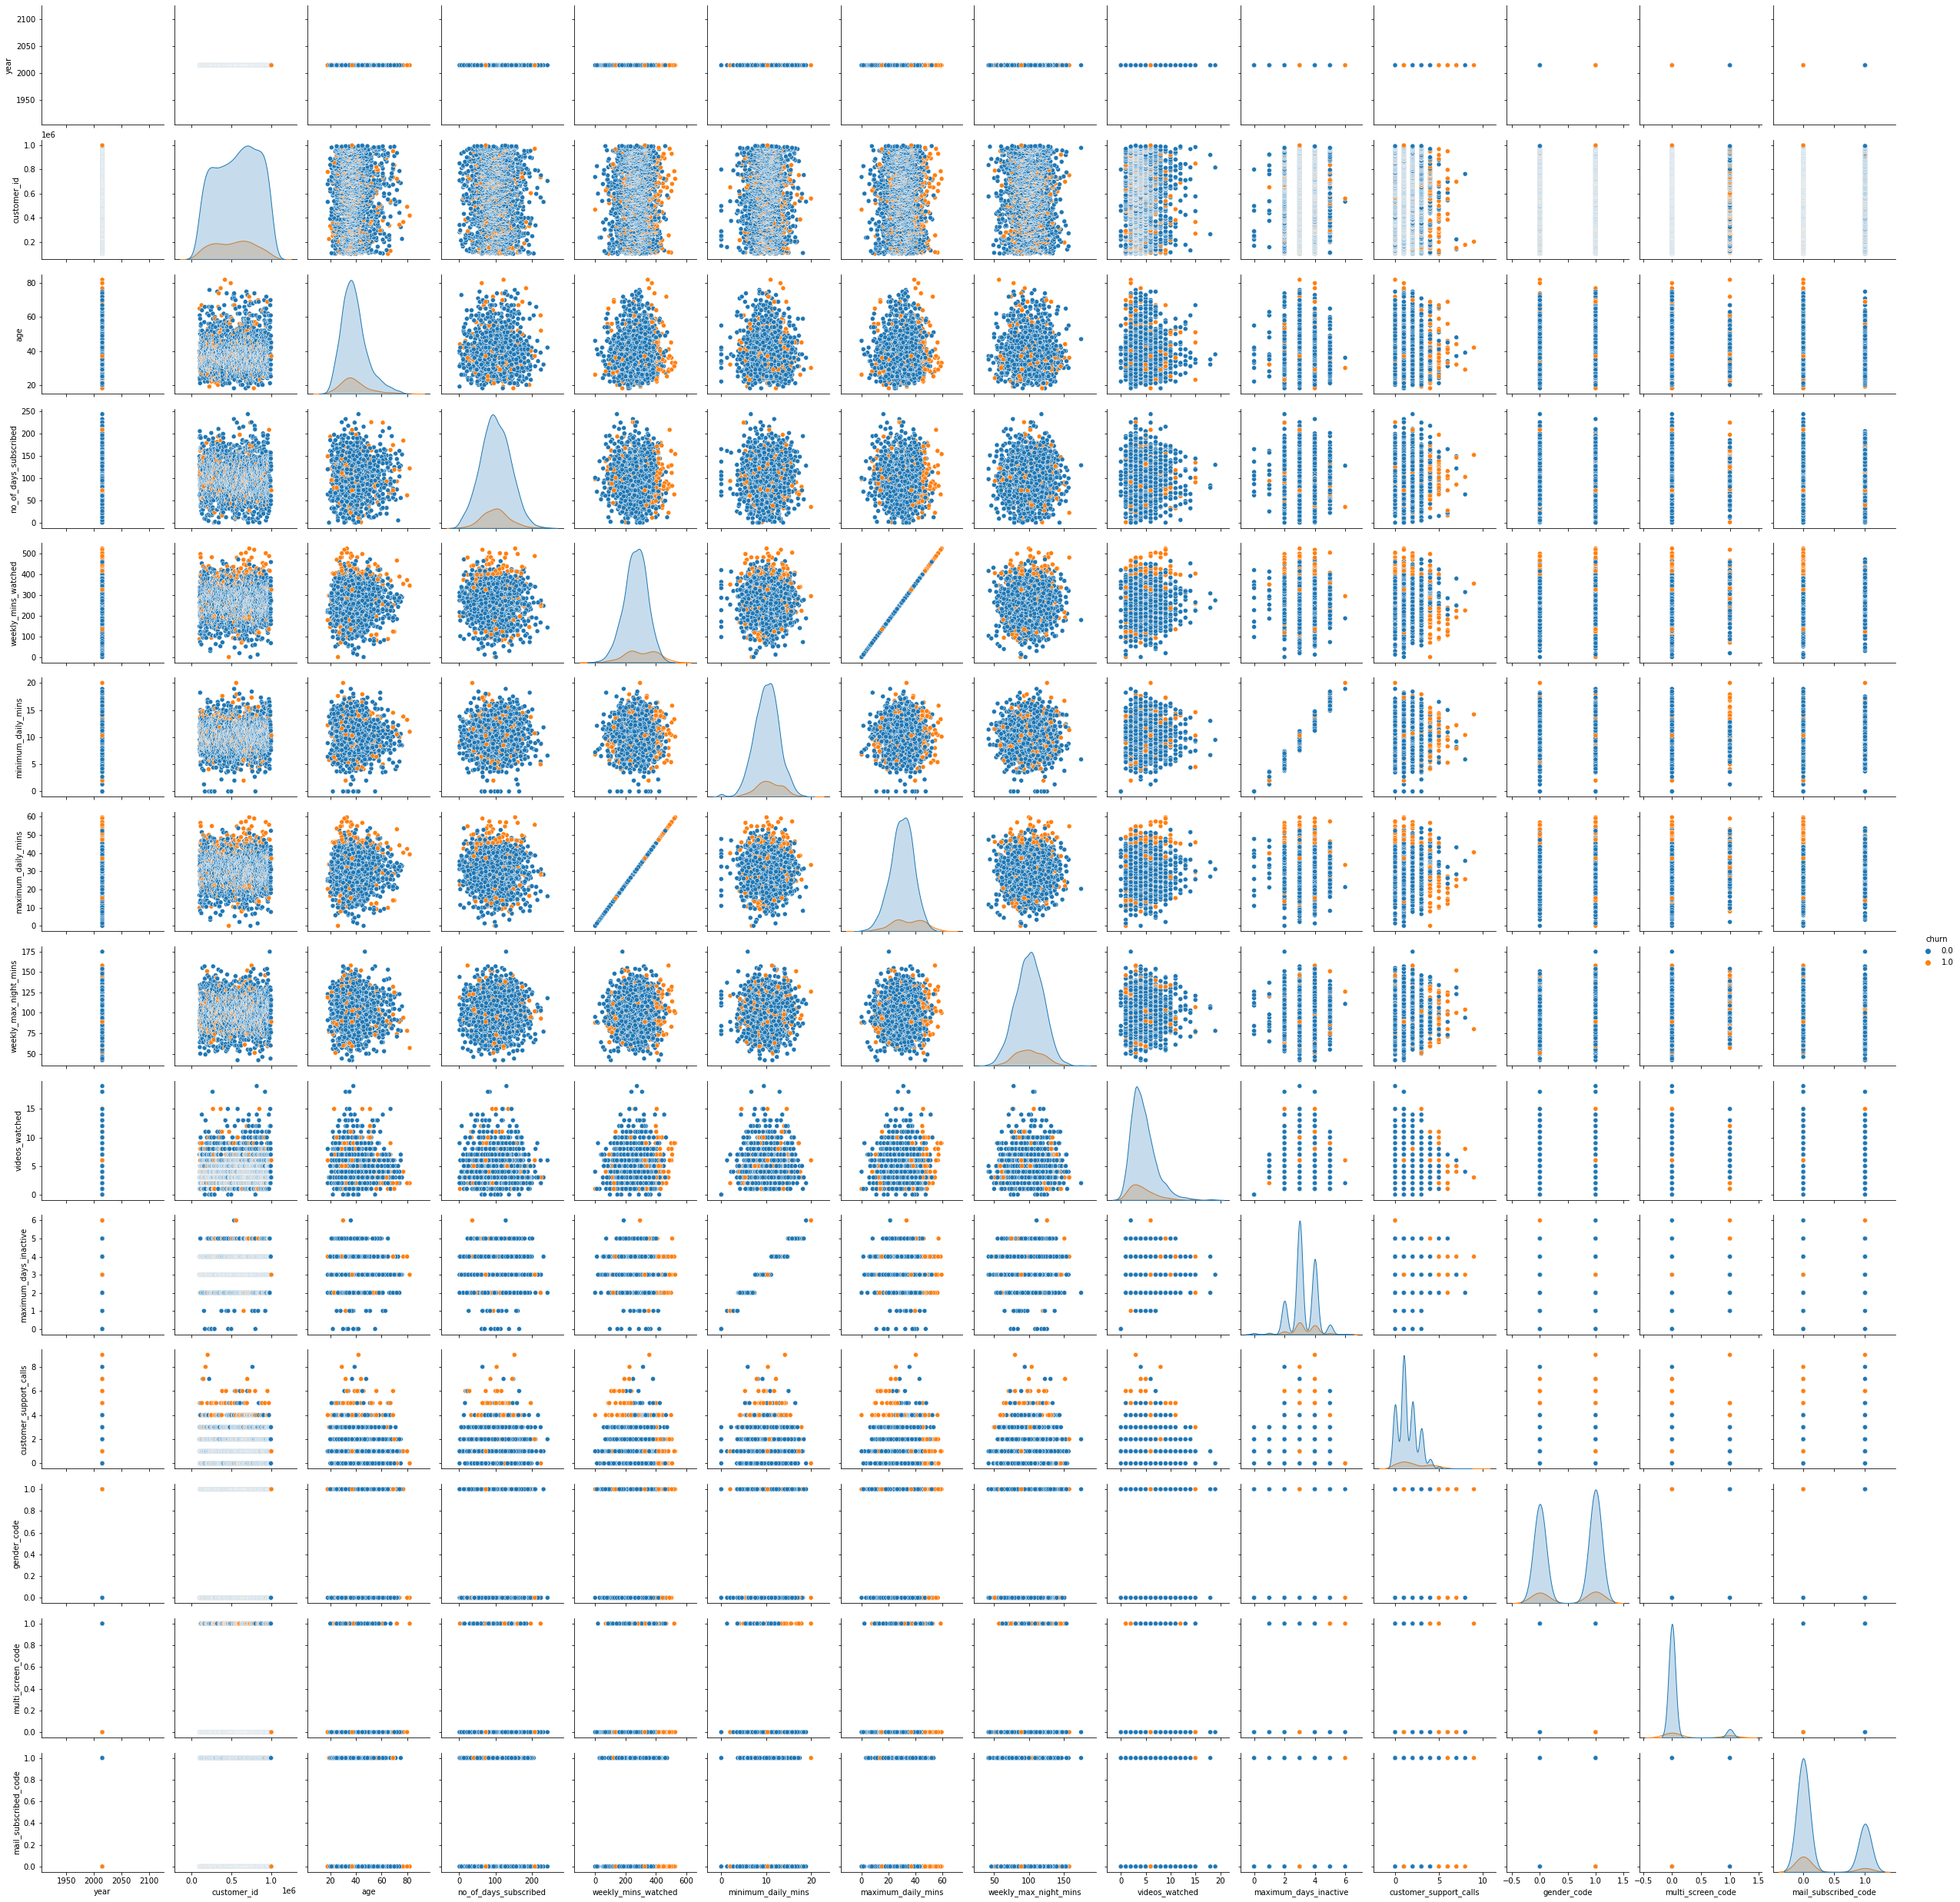

In [11]:
full_plot(data,class_col='churn', cols_to_exclude=['customer_id','phone_no', 'year'])

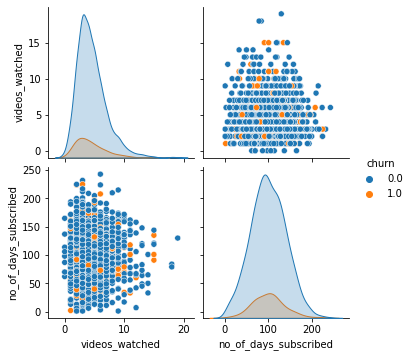

In [12]:
# function for creating plots for selective columns only
def selected_diagnotic(data,class_col, cols_to_eval):
  cols_to_eval.append(class_col) 
  X = data[cols_to_eval] # only selective columns
  sns.pairplot(X, hue=class_col) # plot

selected_diagnotic(data, class_col='churn', cols_to_eval=['videos_watched', 'no_of_days_subscribed'])

In [13]:
def logistic_regression(data, class_col, cols_to_exclude):
  cols = data.select_dtypes(include=np.number).columns.tolist() 
  X = data[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)] # unwanted columns 

  y = data[class_col] # the target variable 
  logit_model = sm.Logit(y,X) 
  result = logit_model.fit() # fit the model 
  print(result.summary2()) # check for summary 

logistic_regression(data, class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2022-04-17 00:59   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [14]:
def prepare_model(data, class_col, cols_to_exclude):
  # Split in training and test set
  # Selecting only the numerical columns and excluding the columns we specified in the function
  cols = data.select_dtypes(include=np.number).columns.tolist() 
  X = data[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)]
  # Selecting y as a column
  y = data[class_col]
  return train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [15]:
def run_model(X_train, X_test, y_train, y_test):
  # Fitting the logistic regression
  logreg = LogisticRegression(random_state=13)
  logreg.fit(X_train, y_train) # fit the model
  # Predicting y values
  y_pred = logreg.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report 
  print("The area under the curve is:", logit_roc_auc)  # check for AUC
  return y_pred

In [16]:
X_train, X_test, y_train, y_test = prepare_model(data, class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])
y_pred = run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.5547201336675021


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
def confusion_m(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  tn, fp, fn, tp = cm.ravel()
  print("TN:", tn)
  print("TP:", tp)
  print("FN:", fn)
  print("FP:", fp)

## Call the function
confusion_m(y_test, y_pred)

[[504   9]
 [ 55   8]]
TN: 504
TP: 8
FN: 55
FP: 9


In [18]:
# class imbalance method 1 
def run_model_bweights(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(random_state=13, class_weight='balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is:", logit_roc_auc) # AUC curve

In [19]:
run_model_bweights(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.7602339181286549


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# class imbalance method 2
def run_model_aweights(X_train, X_test, y_train, y_test, w):
    logreg = LogisticRegression(random_state=13, class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [21]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# class imbalance method 3
def adjust_imbalance(X_train, y_train, class_col):
  X = pd.concat([X_train, y_train], axis=1)
  # separate the 2 classes. Here we divide majority and minority classes
  class0 = X[X[class_col] == 0]
  class1 = X[X[class_col] == 1]
  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True, # Upsampling with replacement
                              n_samples=len(class0), ## Number to match majority class
                              random_state=10) 
    resampled_data = pd.concat([resampled, class0]) ## # Combination of majority and upsampled minority class
  # Case 1 - resamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False, ## false instead of True like above
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_data = pd.concat([resampled, class0])
  return resampled_data

In [23]:
## Call the function
resampled_data = adjust_imbalance(X_train, y_train, class_col='churn')
X_train, X_test, y_train, y_test = prepare_model(resampled_data, class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       339
         1.0       0.74      0.67      0.70       353

    accuracy                           0.71       692
   macro avg       0.71      0.71      0.71       692
weighted avg       0.71      0.71      0.71       692

The area under the curve is: 0.7103838150868661


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
def prepare_data_smote(data,class_col,cols_to_exclude):
  # Synthetic Minority Oversampling Technique. 
  # Generates new instances from existing minority cases that you supply as input. 
  cols = data.select_dtypes(include=np.number).columns.tolist() 
  X = data[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y = data[class_col]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  # run SMOTE on training set only
  X_train, y_train = sm.fit_resample(X_train, y_train)
  return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = prepare_data_smote(data,class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83       513
         1.0       0.26      0.79      0.39        63

    accuracy                           0.73       576
   macro avg       0.61      0.76      0.61       576
weighted avg       0.89      0.73      0.78       576

The area under the curve is: 0.7584238373712058


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1.